<a href="https://colab.research.google.com/github/mkumail51/USA-House-Price-Prediction/blob/main/USA%20House%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression Model using Scikit-Learn


In [29]:
# import Libraries

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


##  Training Data Pre-Processing

The first step in the machine learning pipeline is to clean and transform the training data into a useable format for analysis and modeling.

As such, data pre-processing addresses:
*   Assumptions about data shape
*   Incorrect data types
*  Outliers or errors
*   Missing values
*   Categorical variables







In [30]:
# Load data

full_data = pd.read_csv("/content/USA_Housing.csv")

In [31]:
#data shape
full_data.shape

(5000, 7)

In [32]:
#view first fw rows

full_data.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [33]:
#View last few rows
full_data.tail(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [34]:
#Data Info

full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


## Visualize Missing Data


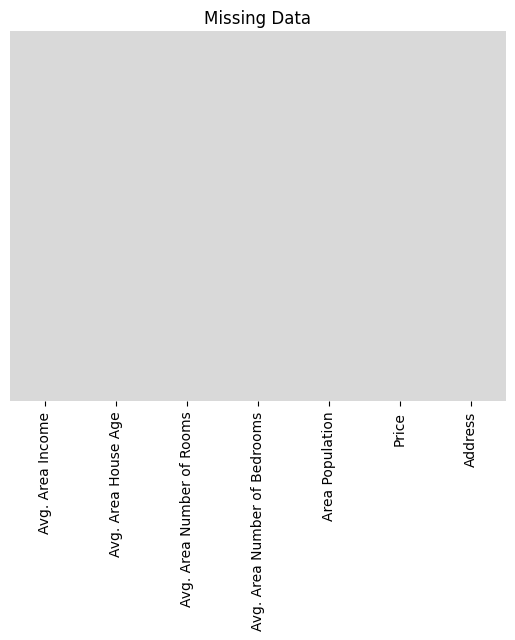

In [35]:
sns.heatmap(full_data.isnull(), yticklabels = False, cbar=False, cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

In [36]:
#Remove Address Feature

full_data.drop('Address', axis = 1, inplace = True)

In [37]:
full_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [38]:
#Numeric Summary
full_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [39]:
#shape of data
full_data.shape

(5000, 6)

## Target Variable Splitting

In [40]:
#SPlit data

x = full_data.drop('Price', axis =1) #catch all columns except price
y = full_data['Price']   #This is column we are trying to predict

In [41]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.transform(x)

In [42]:
x_transform.shape
x_transform

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [43]:
y.shape

(5000,)

In [44]:
# use x and y variables to split data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_transform, y, test_size = 0.10, random_state = 101)

## Model Training

In [45]:
# Model Training with Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [46]:
#Model Prediction

y_pred = lr.predict(x_test)
print(y_pred)

[1257098.09685349  822086.76211938 1739484.60206384  973128.9269703
  993918.45735573  645734.60078803 1074412.81648685  856463.98369062
 1445048.63352694 1201847.71924782 1454475.51805013 1296582.98910134
 1736858.04511704 1336694.59015483 1386280.00636484 1223122.34992068
  615840.78603611  964515.62334817 1222020.63802963 1197532.31828304
  506756.96702134 1767894.37065039 1854829.42630351 1198521.37525139
 1065384.60130188 1810199.62960618 1767830.26189968 1440162.9747667
 1386122.51652193 1539972.94909227  729561.93190619 1754434.69364763
 1465273.07428251 1026021.79840116 1283514.57970667  917688.32850804
 1185681.03610736 1000137.89595728 1329344.79847155  784262.29954368
 1392528.47637802  576569.30274928  823465.14446257 1893895.24014477
 1671565.73974773  964720.06183539 1129280.90868273  792574.96874635
 1159381.43948676 1473209.24685792 1459527.31772498 1164492.85979007
 1098752.99065475 1360158.14296951  843194.09463543  985298.51640372
 1123531.58586396 1252412.0965265  1

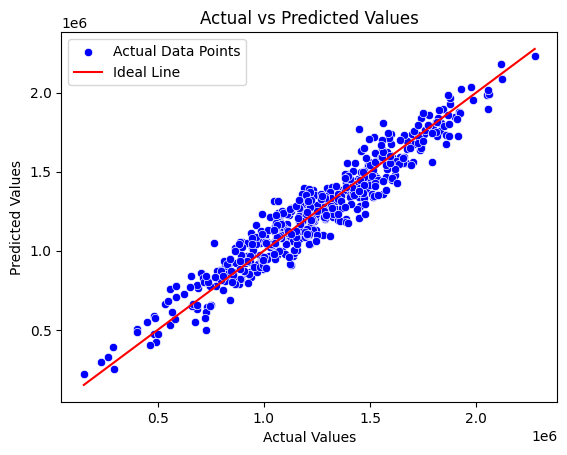

In [47]:
# Visualize prediction with scatter plot
sns.scatterplot(x=y_test, y=y_pred, color='blue', label = 'Actual Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

## Evaluation

In [48]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R squared: ", r2)

R squared:  0.9249755372937847


In [49]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 9839952411.801708
Root Mean Squared Error: 99196.53427313732


## Desicion Tree




In [50]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

# Prediction
y_pred = dt.predict(x_test)

#Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Decision Tree Regressor: ", mse)

Decision Tree Regressor:  31066787711.93422


## Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

#prediction
y_pred = rf.predict(x_test)

#Evaluation
mean_error = mean_squared_error(y_test, y_pred)
print('Radom Forest Regressor: ', mean_error)


Radom Forest Regressor:  14083610506.753345
